# Running Llava: a large multi-modal model on Google Colab

Run Llava model on a Google Colab!

Llava is a multi-modal image-text to text model that can be seen as an "open source version of GPT4". It yields to very nice results as we will see in this Google Colab demo.

![image/png](https://cdn-uploads.huggingface.co/production/uploads/62441d1d9fdefb55a0b7d12c/FPshq08TKYD0e-qwPLDVO.png)

The architecutre is a pure decoder-based text model that takes concatenated vision hidden states with text hidden states.

We will leverage QLoRA quantization method and use `pipeline` to run our model.

In [12]:
from datasets import load_dataset

In [13]:
newyorker491 = load_dataset("alex-smith/newyorker_CS491")
newyorker491=newyorker491['train']

newyorker491

Dataset({
    features: ['image', 'contest_number', 'image_location', 'image_description', 'image_uncanny_description', 'questions', 'caption_choices', 'label', 'contest_count', 'scene'],
    num_rows: 2601
})

In [14]:
img=newyorker491['image'][31]

## Load an image

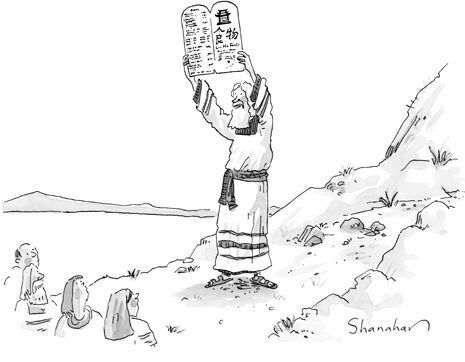

In [15]:
# import requests
from PIL import Image


image = img
image

## Preparing the quantization config to load the model in 4bit precision

In order to load the model in 4-bit precision, we need to pass a `quantization_config` to our model. Let's do that in the cells below

In [16]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

## Load the model using `pipeline`

We will leverage the `image-to-text` pipeline from transformers !

In [18]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

RuntimeError: No GPU found. A GPU is needed for quantization.

It is important to prompt the model wth a specific format, which is:
```bash
USER: <image>\n<prompt>\nASSISTANT:
```

In [ ]:
max_new_tokens = 200
prompt = "USER: <image>\n  Study the image for humor then write caption for a joke.\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
  Study the image for humor then write caption for a joke.
ASSISTANT: A man is holding a large book, which appears to be a Bible, and is standing on a hill. He is wearing a long robe and has a beard. The man is looking down at a group of people who are sitting on the ground, seemingly listening to him. The scene is reminiscent of a biblical story, with the man possibly being Moses or another religious figure.

Caption: "When you're trying to teach the people, you gotta get their attention somehow."


The model has managed to successfully describe the image with accurate result ! We also support other variants of Llava, such as [`bakLlava`](https://huggingface.co/llava-hf/bakLlava-v1-hf) which should be all posted inside the [`llava-hf`](https://huggingface.co/llava-hf) organization on 🤗 Hub